# Beleg 2: Bilddateien, Bilddarstellung und Bilddiskretisierung

**Name:**
<br>
**Matrikelnr.:**

## Bearbeitungszeitraum
**Bearbeitungsbeginn:** Mi, 17.11.2022
<br>
**Abgabe (in der Übung zu zeigen bis spätestens):** Mi, 05.01.2023


**Hinweise zum Beleg:** 
- Die erfolgreiche Bearbeitung des Belegs ist zwingende Voraussetzung zur Teilnahme an der Klausur. 
- Sofern nicht anders angegeben können die Operationen mit einer Library Ihrer Wahl durchgeführt werden.


### Segmentierung von Mitosen im PHH3

In dieser Aufgabe werden Sie sich mit der Segmentierung von Mitosen auseinandersetzen. Mitosen sind Zellen, die sich gerade in Teilung befinden. Zwar ist dies ist ein natürlicher Prozess, jedoch findet er so selten statt, dass es statistisch unwahrscheinlich ist, eine Mitose in einem histologischen Schnitt zu finden. Innerhalb von Tumorgewebe jedoch ist die Proliferationsrate (sprich die Rate, mit der sich das Gewebe durch Zellteilung vermehrt) deutlich höher. Für diverse Tumorentitäten spielt die Erfassung dieser Proliferationsrate, etwa durch Auszählung von Mitosen, eine wesentliche Rolle in der Bewertung der Malignität.

### Viel Erfolg!

**Aufgabe 1.1**: Schauen Sie sich zunächst die Bilder im Ordner `mitosis_set` an. Hierbei handelt es sich um invasives Mammakarzinom, welches mit der IHC-Färbung für das Protein Phosphohistone-H3 (PHH3) gefärbt wurde. Der braune Ton der Mitosen entsteht durch Diaminobenzidine (DAB) welches an die entsprechenden Antikörper für das PHH3 gebunden ist. Die blaue Färbung der nicht-mitotischen Zellkerne entsteht durch Haematoxylin. 

Die Dateinamen der Bilder enthalten jeweils zwei Informationen: Zum einen die ID des Bilders (eine fortlaufende Nummer beginnend mit 01) sowie die Anzahl der jeweils im Bild enthaltenen Mitosen. Die Angaben sind durch einen Underscore (\_) getrennt. Lesen Sie nun alle Bilder ein. Überlegen Sie sich eine passende Datenstruktur zur Speicherung der jeweiligen Anzahl an Mitosen.

**任务 1.1**：首先，查看 `mitosis_set` 文件夹中的图像。 这是一种浸润性乳腺癌，用 IHC 染色法对蛋白质磷酸组蛋白-H3 (PHH3) 进行染色。 有丝分裂的棕色调是由二氨基联苯胺 (DAB) 引起的，它与 PHH3 的相应抗体结合。 非有丝分裂细胞核的蓝色着色是由苏木精引起的。

每个图像的文件名包含两条信息：图像的 ID（以 01 开头的连续数字）和图像中包含的有丝分裂数。 信息由下划线 (\_) 分隔。 现在读入所有图像。 考虑一个合适的数据结构来存储相应的有丝分裂数。

In [ ]:
# 1.1
# mit dict speichern
import os
dir_path = 'mitosis_set'
file_name_list = os.listdir(dir_path)
id_amount_dict = {}
for file_name in file_name_list:
    id_amount = file_name.split('.')[0]
    id = id_amount.split('_')[0]
    amount = id_amount.split('_')[1]
    id_amount_dict[id] = int(amount)
print(id_amount_dict)

**Aufgabe 1.2**: Entwickeln Sie ein Verfahren zur Segmentierung der Mitosen. Als Teilschritte sollen sowohl die Segmentierungsmasken als auch die im Originalbild hevorgehobenen Mitosen (entweder, indem das Bild anhand der Maske zugeschnitten oder indem die Mitosen mit einem Polygon markiert wurden) ausgegeben werden. Am Ende soll für jedes Bild die Anzahl an gefundenen Mitosen ausgegeben werden. Beginnen Sie erst mit Aufgabe 1.3, wenn ihr Algorithmus für jedes Bild die korrekte Anzahl an Mitosen findet.

**任务 1.2**：开发一种分割有丝分裂的方法。 分割蒙版和原始图像中突出显示的有丝分裂（通过使用蒙版裁剪图像或用多边形标记有丝分裂）都应作为子步骤输出。 最后，应为每个图像输出找到的有丝分裂数。 在您的算法为每个图像找到正确的有丝分裂数之前，不要开始练习 1.3。

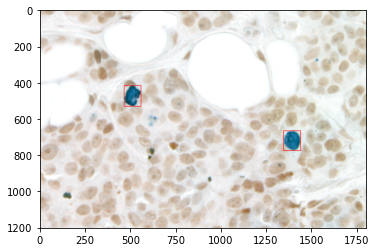

2

In [15]:
# 1.2

import cv2
import numpy as np
import matplotlib.pyplot as plt

area_threshold = 1400
def segment(file_name):
    img = cv2.imread(file_name)
    img = cv2.GaussianBlur(img, (7,7), 10)

    # Mithilfe des HSV-Raums die Maske für Hervorhebung der Zielregionen festlegen
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    lower_bound = np.array([10, 100, 100])
    upper_bound = np.array([30, 255, 200])
    mask_hsv = cv2.inRange(hsv, lower_bound, upper_bound)
    img_masked = cv2.bitwise_and(img, img, mask = mask_hsv)
    img_masked = cv2.GaussianBlur(img_masked, (7,7), 10)
    # plt.imshow(img_masked)
    # plt.show()

    # Dilatation und Erosion
    kernel = np.ones((7, 7))
    img_masked = cv2.erode(img_masked, kernel, 10)
    img_masked = cv2.dilate(img_masked, kernel, 10)
    # plt.imshow(img_masked)
    # plt.show()

    # Segmentierung
    img_masked_dilated_gray = cv2.cvtColor(img_masked, cv2.COLOR_BGR2GRAY)
    contours, _ = cv2.findContours(img_masked_dilated_gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

    count = 0
    for each in contours:
        x,y,w,h = cv2.boundingRect(each)
        # Rauschen beseitigen
        if  w * h < area_threshold:
            continue
        # print(w * h)
        cv2.rectangle(img, (x, y), (x+w, y+h), (255,0,0), 2)
        count += 1

    plt.imshow(img)
    plt.show()

    return count

segment("mitosis_set/09_2.png")

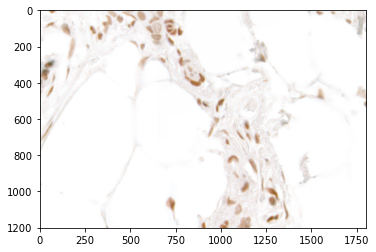

id:  01 , expected amount:  0 , detected amount:  0


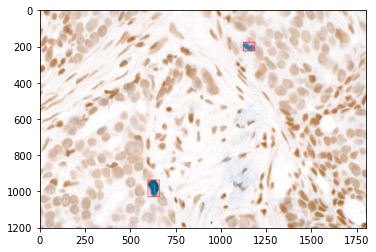

id:  02 , expected amount:  2 , detected amount:  2


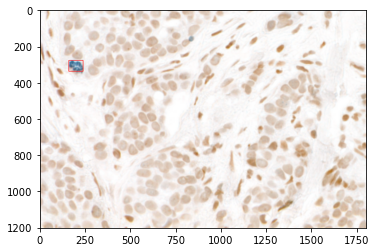

id:  03 , expected amount:  1 , detected amount:  1


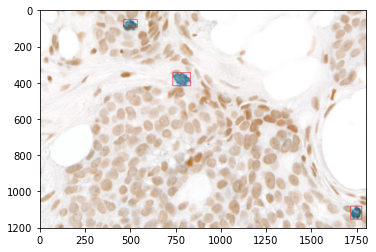

id:  04 , expected amount:  3 , detected amount:  3


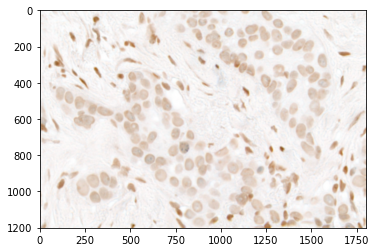

id:  05 , expected amount:  0 , detected amount:  0


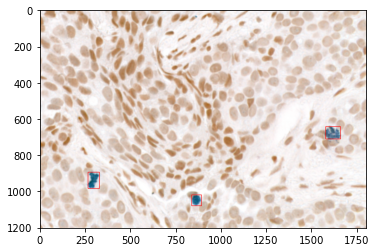

id:  06 , expected amount:  3 , detected amount:  3


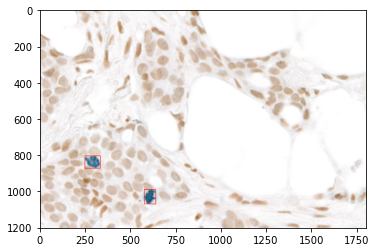

id:  07 , expected amount:  2 , detected amount:  2


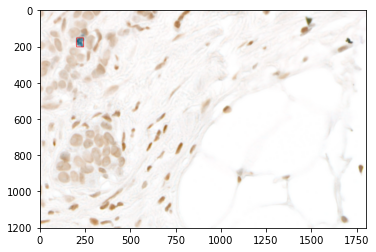

id:  08 , expected amount:  1 , detected amount:  1


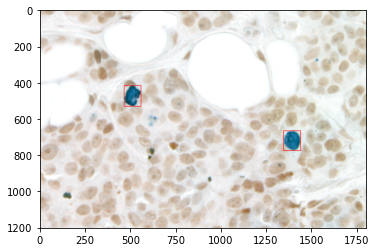

id:  09 , expected amount:  2 , detected amount:  2


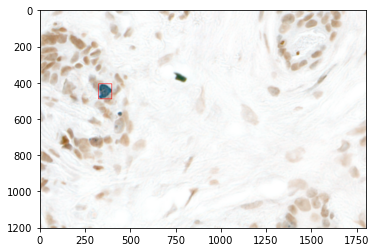

id:  10 , expected amount:  1 , detected amount:  1


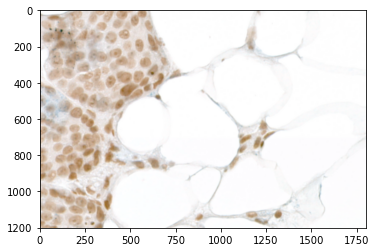

id:  11 , expected amount:  0 , detected amount:  0


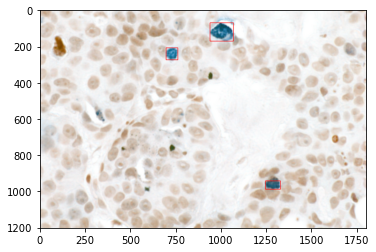

id:  12 , expected amount:  3 , detected amount:  3


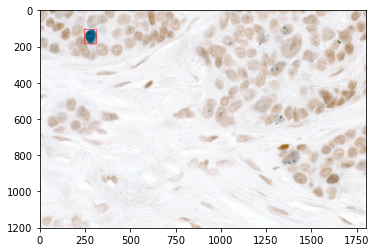

id:  13 , expected amount:  1 , detected amount:  1


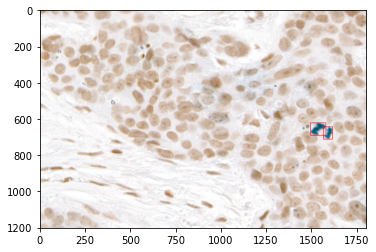

id:  14 , expected amount:  2 , detected amount:  2


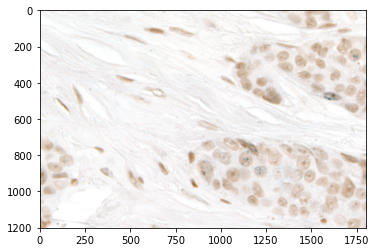

id:  15 , expected amount:  0 , detected amount:  0


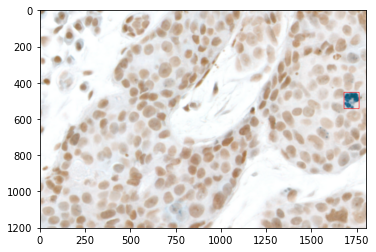

id:  16 , expected amount:  1 , detected amount:  1


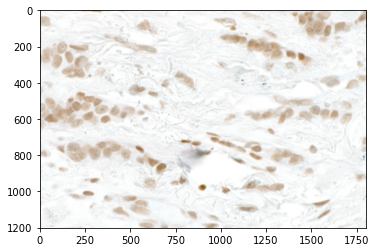

id:  17 , expected amount:  0 , detected amount:  0


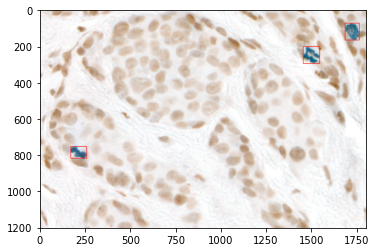

id:  18 , expected amount:  3 , detected amount:  3


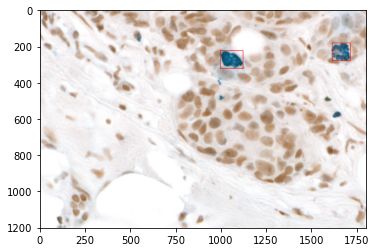

id:  19 , expected amount:  2 , detected amount:  2


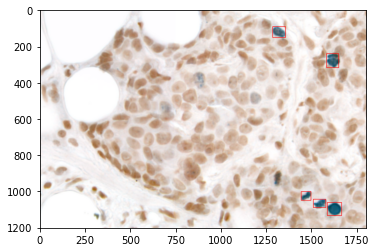

id:  20 , expected amount:  5 , detected amount:  5
average accuracy:  1.0


In [16]:
import os
dir_path = 'mitosis_set/'
file_name_list = os.listdir(dir_path)
id_amount_dict = {}
sum_expected, sum_detected = 0, 0
for file_name in file_name_list:
    id_amount = file_name.split('.')[0]
    id = id_amount.split('_')[0]
    amount_expected = int(id_amount.split('_')[1])
    sum_expected += amount_expected
    amount_detected = segment(dir_path + file_name)
    sum_detected += amount_detected
    print('id: ', id, ', expected amount: ', amount_expected, ', detected amount: ', amount_detected)

print('average accuracy: ', sum_detected / sum_expected)

**Aufgabe 1.3**: Lesen Sie nun die Dateien aus dem Ordner `mitosis_test_set` ein, indem Sie erneut ihre zuvor definierte Datenstruktur verwenden. Wenden Sie ihr Verfahren einmalig auf diese Daten an (einmalig in dem Sinne, dass keine weitere Optimierung des Algorithmus durchgeführt wird) und geben Sie für jedes Bild aus, wieviele Mitosen ihre Implementierung gefunden hat und wieviele laut Dateinamen zu finden gewesen wären. Schließlich geben Sie noch die Genaugikeit ihrer Lösung für diesen Datensatz an, in dem Sie die Gesamtzahl der gefundenen Mitosen durch die Gesamtzahl der tatsächlichen Mitosen teilen.

**任务 1.3**：现在再次使用之前定义的数据结构从“mitosis_test_set”文件夹中读取文件。 将您的方法应用于该数据一次（一次是指不再执行算法的进一步优化），并为每个图像输出您的实现发现了多少个有丝分裂以及根据文件名应该找到多少个。 最后，您通过将找到的有丝分裂总数除以实际有丝分裂总数来说明您对该数据集的解决方案的准确性。

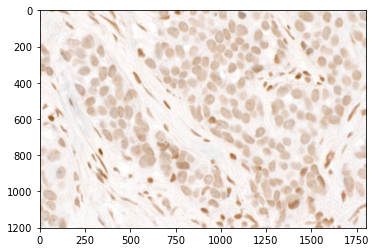

id:  01 , expected amount:  0 , detected amount:  0


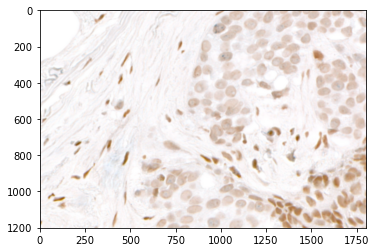

id:  02 , expected amount:  0 , detected amount:  0


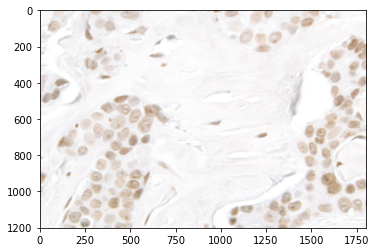

id:  03 , expected amount:  0 , detected amount:  0


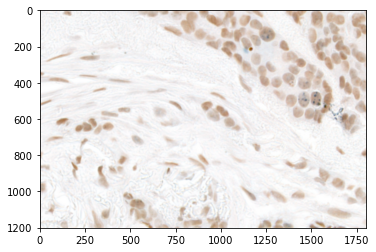

id:  04 , expected amount:  0 , detected amount:  0


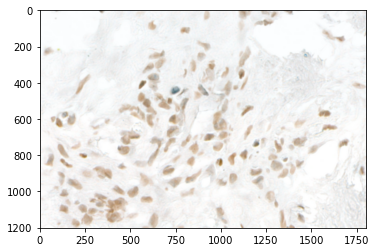

id:  05 , expected amount:  0 , detected amount:  0


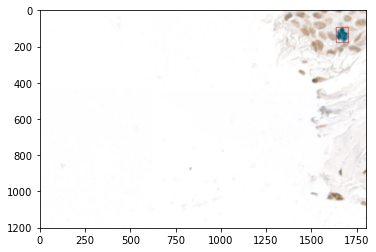

id:  06 , expected amount:  1 , detected amount:  1


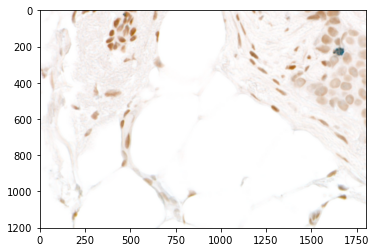

id:  07 , expected amount:  1 , detected amount:  0


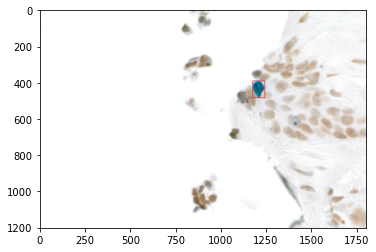

id:  08 , expected amount:  1 , detected amount:  1


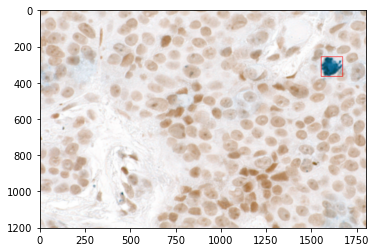

id:  09 , expected amount:  1 , detected amount:  1


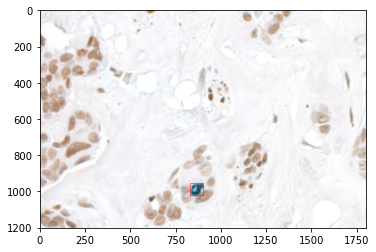

id:  10 , expected amount:  1 , detected amount:  1


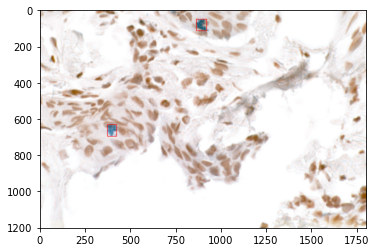

id:  11 , expected amount:  2 , detected amount:  2


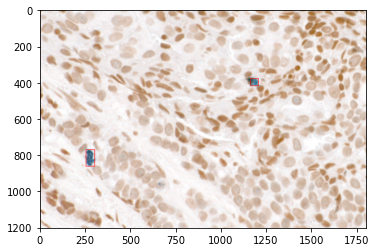

id:  12 , expected amount:  2 , detected amount:  2


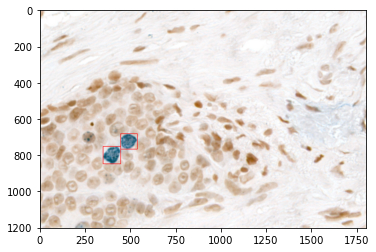

id:  13 , expected amount:  2 , detected amount:  2


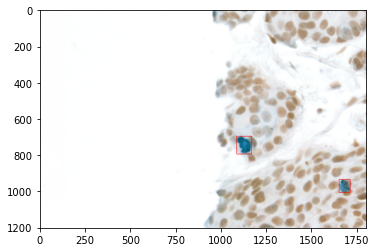

id:  14 , expected amount:  2 , detected amount:  2


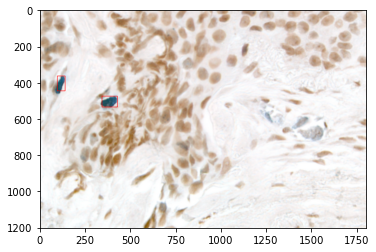

id:  15 , expected amount:  2 , detected amount:  2


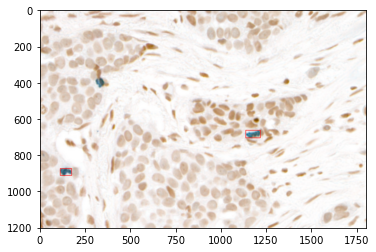

id:  16 , expected amount:  3 , detected amount:  2


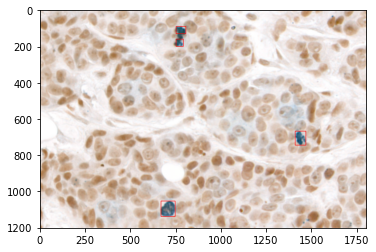

id:  17 , expected amount:  3 , detected amount:  4


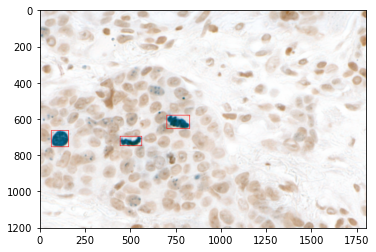

id:  18 , expected amount:  3 , detected amount:  3


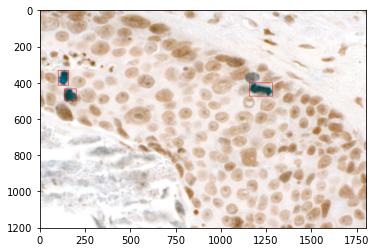

id:  19 , expected amount:  3 , detected amount:  3


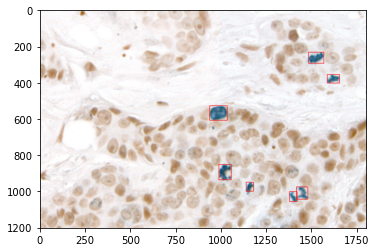

id:  20 , expected amount:  6 , detected amount:  7
average accuracy:  1.0


In [17]:
# 1.3
import os
dir_path = 'mitosis_test_set/'
file_name_list = os.listdir(dir_path)
id_amount_dict = {}
sum_expected, sum_detected = 0, 0
for file_name in file_name_list:
    id_amount = file_name.split('.')[0]
    id = id_amount.split('_')[1]
    amount_expected = int(id_amount.split('_')[2])
    sum_expected += amount_expected
    amount_detected = segment(dir_path + file_name)
    sum_detected += amount_detected
    print('id: ', id, ', expected amount: ', amount_expected, ', detected amount: ', amount_detected)

print('average accuracy: ', sum_detected / sum_expected)